In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tkinter.filedialog import askdirectory 

In [2]:
#Choose the directory containing the extracted files
path = askdirectory()
path+="/"

In [3]:
videos= pd.read_csv(path+"videos.txt",encoding="ISO-8859-1",sep="\t")
comments= pd.read_csv(path+"comments.txt",encoding="ISO-8859-1",sep="\t")

In [4]:
print(videos.shape)
print(comments.shape)

(800, 11)
(118417, 6)


In [5]:
comments.columns.values

array(['videoId', 'commentId', 'author', 'text', 'replies', 'likes'], dtype=object)

In [7]:
import nltk
#Select vader lexicon from models tab
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia=SIA()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


C:\Users\sriram\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
nrow=comments.shape[0]
results=[]
for i in range(nrow):
    result=sia.polarity_scores(str(comments['text'][i]))
    results.append(result)
    if i%5000==0:
        print (i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000


In [9]:
CommentSentiments=pd.DataFrame(results)

In [10]:
CommentSentiments.shape

(118417, 4)

In [11]:
commentsFinal=pd.concat([comments, CommentSentiments], axis=1)
commentsFinal.head()

,videoId,commentId,author,text,replies,likes,compound,neg,neu,pos
0,5dsGWM5XGdg,z13sjvf51qrje54k323ztrvgjoikuzfkw,Nathan Lambert,The cat with the bag on its head could of died...,34,231,-0.2263,0.208,0.636,0.156
1,5dsGWM5XGdg,z12lvlexhzv3wxyyb04chh25kkzlflbhkns0k,The Dudes,Who did not laugh?,35,176,-0.4449,0.494,0.506,0.000
2,5dsGWM5XGdg,z12avjxxix3wvtkt323ixverpkuyhf0vr,Surbhi Jyoyi,7:36 was Damn so cute,10,77,0.2883,0.282,0.314,0.404
3,5dsGWM5XGdg,z13ribtq1zeftb1u122uet553xnwvhk32,i am do yuo a look wit me ayes,I don't understand why people allow their anim...,8,71,0.5267,0.000,0.845,0.155
4,5dsGWM5XGdg,z13mcn5b4vqltv2wn04ch1h4ds2ljrabfsc0k,Joe mulholland,Sad people having fun seeing their cats suffer,14,90,-0.5106,0.443,0.336,0.221


In [12]:
import re
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

emoticon_re = re.compile(emoticons_str, re.VERBOSE | re.IGNORECASE)

captitalization_re=re.compile(r"\b[A-Z][A-Z]+\b")

elongation_re=re.compile(r"([a-zA-Z0-9])\1{2,}", re.VERBOSE | re.IGNORECASE)

exclamations_re=re.compile(r"[a-zA-Z0-9]+\s*!+", re.VERBOSE | re.IGNORECASE)

interjectionsFile=open(path+"interjections.txt")
interjections_list=[]

for item in interjectionsFile:
    interjections_list.append(item)

    interjections_str="|".join(interjections_list)

interjections_re=re.compile(interjections_str, re.VERBOSE | re.IGNORECASE)

In [13]:
def countEmoticons(text):
    return len(emoticon_re.findall(str(text)))
def countCapitalizations(text):
    return len(captitalization_re.findall(str(text)))
def countElongations(text):
    return len(elongation_re.findall(str(text)))
def countInterjections(text):
    return len(interjections_re.findall(str(text)))
def countExclamations(text):
    return len(exclamations_re.findall(str(text)))
def check(count):
    return 1 if count>0 else 0

In [14]:
commentsFinal.columns.values

array(['videoId', 'commentId', 'author', 'text', 'replies', 'likes',
       'compound', 'neg', 'neu', 'pos'], dtype=object)

In [ ]:
#Feature creation

In [15]:
commentsFinal['Emoticons']=comments['text'].apply(countEmoticons)
commentsFinal['Capitalizations']=comments['text'].apply(countCapitalizations)
commentsFinal['Elongations']=comments['text'].apply(countElongations)
commentsFinal['Interjections']=comments['text'].apply(countInterjections)
commentsFinal['Exclamations']=comments['text'].apply(countExclamations)

In [17]:
commentsFinal['hasEmoticons']=commentsFinal['Emoticons'].apply(check)
commentsFinal['hasCapitalizations']=commentsFinal['Capitalizations'].apply(check)
commentsFinal['hasElongations']=commentsFinal['Elongations'].apply(check)
commentsFinal['hasInterjections']=commentsFinal['Interjections'].apply(check)
commentsFinal['hasExclamations']=commentsFinal['Exclamations'].apply(check)

In [18]:
sum(commentsFinal['compound'])/commentsFinal.shape[0]

0.095787281386965101

In [19]:
commentsFinal.columns.values

array(['videoId', 'commentId', 'author', 'text', 'replies', 'likes',
       'compound', 'neg', 'neu', 'pos', 'Emoticons', 'Capitalizations',
       'Elongations', 'Interjections', 'Exclamations', 'hasEmoticons',
       'hasCapitalizations', 'hasElongations', 'hasInterjections',
       'hasExclamations'], dtype=object)

In [20]:
#Getting the mean value for each metric at a video level
outData=commentsFinal.groupby(['videoId'])['compound','Emoticons', 'Capitalizations',
       'Elongations', 'Interjections', 'hasEmoticons',
       'hasCapitalizations', 'hasElongations', 'hasInterjections','Exclamations', 'hasExclamations'].mean()
outData=outData.reset_index()

In [21]:
outData.head()

,videoId,compound,Emoticons,Capitalizations,Elongations,Interjections,hasEmoticons,hasCapitalizations,hasElongations,hasInterjections,Exclamations,hasExclamations
0,-0LQ-OBUgiA,0.057730,0.034483,0.181034,0.068966,1.931034,0.034483,0.086207,0.068966,0.594828,0.068966,0.060345
1,-FiSlFDDirE,0.079794,0.053691,1.181208,0.194631,3.577181,0.046980,0.134228,0.140940,0.791946,0.060403,0.053691
2,-MjQ4XtgTUM,0.184595,0.069307,0.049505,0.207921,0.712871,0.059406,0.049505,0.069307,0.356436,0.217822,0.168317
3,-NkhD3xquMU,0.161613,0.020000,0.670000,0.200000,1.470000,0.020000,0.205000,0.080000,0.725000,0.140000,0.125000
4,-TjtoP6-mcQ,0.125906,0.025381,0.436548,0.071066,1.274112,0.020305,0.126904,0.060914,0.644670,0.096447,0.060914


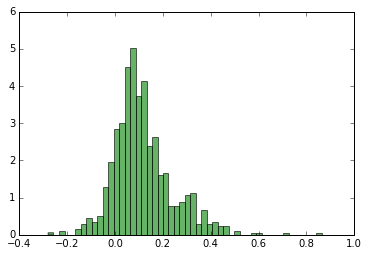

In [22]:
#Histogram of the sentiment scores of comments aggregated at a video level
x=plt.hist(outData['compound'], 50, normed=1, facecolor='green', alpha=0.6)

In [23]:
#Merging the initial video data with the metrics data
finalData=pd.merge(videos,outData,how='left', left_on=["videoId"] , right_on = ["videoId"])

In [24]:
finalData.head(2)

,keyword,channelId,channelTitle,videoId,videoTitle,videoDesc,viewCount,likeCount,dislikeCount,commentCount,...,Emoticons,Capitalizations,Elongations,Interjections,hasEmoticons,hasCapitalizations,hasElongations,hasInterjections,Exclamations,hasExclamations
0,funny cats,UCKy3MG7_If9KlVuvw3rPMfw,Tiger Productions,5dsGWM5XGdg,Cats are so funny you will die laughing - Funn...,Cats are simply the funniest and most hilariou...,37294210,138653,14904,11928,...,0.03,0.460,0.07,1.515,0.03,0.155,0.055,0.675,0.13,0.115
1,funny cats,UC9obdDRxQkmn_4YpcBMTYLw,Tiger FunnyWorks,htOroIbxiFY,Cats are just the funniest pets ever - Funny c...,"Kitties, cats. Simply the funniest pets! Can't...",8297349,37989,3674,5212,...,0.07,0.605,0.10,1.545,0.06,0.135,0.090,0.670,0.17,0.120


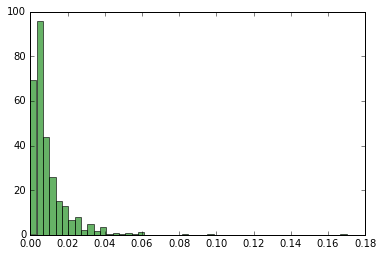

In [25]:
finalData['Likeability']=(finalData['likeCount']-finalData['dislikeCount'])/finalData['viewCount']
x=plt.hist(finalData['Likeability'], 50, normed=1, facecolor='green', alpha=0.6)

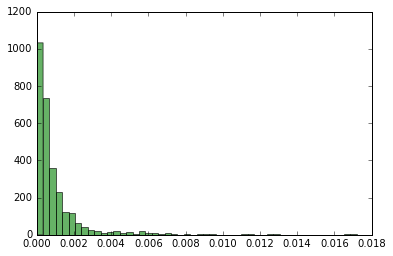

In [26]:
finalData['Engage']=finalData['commentCount']/finalData['viewCount']
x=plt.hist(finalData['Engage'], 50, normed=1, facecolor='green', alpha=0.6)

In [27]:
finalData.columns.values

array(['keyword', 'channelId', 'channelTitle', 'videoId', 'videoTitle',
       'videoDesc', 'viewCount', 'likeCount', 'dislikeCount',
       'commentCount', 'favoriteCount', 'compound', 'Emoticons',
       'Capitalizations', 'Elongations', 'Interjections', 'hasEmoticons',
       'hasCapitalizations', 'hasElongations', 'hasInterjections',
       'Exclamations', 'hasExclamations', 'Likeability', 'Engage'], dtype=object)

In [28]:
#Six metrics used to access the video
reqCols=['videoId','Likeability', 'Engage','Capitalizations', 'Elongations','compound','Exclamations']
temp1=finalData[reqCols]

In [29]:
temp2=temp1.ix[:,1:]
temp_norm = (temp2 - temp2.min()) / (temp2.max() - temp2.min())

In [30]:
temp_norm.head()

,Likeability,Engage,Capitalizations,Elongations,compound,Exclamations
0,0.019519,0.018598,0.131429,0.080174,0.291298,0.130000
1,0.024327,0.036526,0.172857,0.114535,0.368787,0.170000
2,0.020868,0.027624,0.177843,0.093498,0.292416,0.178571
3,0.025267,0.017678,0.058866,0.126621,0.366871,0.170854
4,0.013229,0.010123,0.085137,0.069415,0.384328,0.101010


In [31]:
#Merging with the videoId column
results=pd.concat([temp1.ix[:,0], temp_norm], axis=1)

In [32]:
results['score']=np.sum(results.ix[:,1:],axis=1)

In [33]:
results=results.sort('score', ascending=False)

C:\Users\sriram\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [34]:
#Top 10 videos
results.head(10)

,videoId,Likeability,Engage,Capitalizations,Elongations,compound,Exclamations,score
79,_GagdZLvSXI,0.046537,0.030669,1.000000,0.000000,0.651868,0.500000,2.229075
469,xLRXFShKRWE,0.307420,0.973925,0.185714,0.097355,0.516561,0.100000,2.180975
392,56Pmfyqlzws,0.579487,0.666280,0.027279,0.074822,0.318482,0.396985,2.063335
773,n42JN-TMSkk,1.000000,0.474617,0.088571,0.068721,0.263500,0.120000,2.015410
373,DCXGm4KzZ8A,0.107009,0.073315,0.214286,0.286337,0.563819,0.750000,1.994766
529,VEjzI9ZGlo8,0.186520,0.733067,0.251429,0.217616,0.353462,0.190000,1.932093
707,OE-xVLESXKo,0.261302,1.000000,0.154286,0.057267,0.293378,0.160000,1.926233
113,jLBKO5t7UXI,0.057670,0.240037,0.035714,0.143169,0.624426,0.750000,1.851016
119,5C8lDyaT8RY,0.034808,0.006256,0.000000,0.000000,0.755692,1.000000,1.796756
499,51Rgof0caOE,0.034188,0.053412,0.188083,0.961172,0.329146,0.195980,1.761982


In [35]:
len('6035710416442219563')

19

In [36]:
import requests as re

In [37]:
r = re.get('https://www.google.com')

In [39]:
r.status_code

200

In [40]:
r.headers['content-type']

'text/html; charset=ISO-8859-1'

In [45]:
x=r.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [46]:
a = np.arange(15).reshape(3, 5)

In [47]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [48]:
a.itemsize

4

In [49]:
a.data

In [52]:
)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [53]:
np.empty((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [56]:
np.random.random((2,3))

array([[ 0.1192578 ,  0.37848795,  0.0247349 ],
       [ 0.76639126,  0.15581054,  0.9243582 ]])

In [71]:
text="this is the the the an ana a a of the of this this this"
tokens=text.split(" ")
tokenCounts={}
countTokens={}
maxCount=1
for token in tokens:
    if token not in tokenCounts:
        tokenCounts[token]=1
    else:
        tokenCounts[token]+=1
        countTokens[maxCount]
    if maxCount not in countTokens:
        countTokens[maxCount]=[token]
    else:
        countTokens[maxCount].append(token)

In [58]:
tokenCounts

{'a': 2, 'an': 1, 'ana': 1, 'is': 1, 'of': 2, 'the': 4, 'this': 2}

In [60]:
countTokens

{1: ['this', 'is', 'the'],
 2: ['the'],
 3: ['the', 'an', 'ana', 'a'],
 4: ['a', 'of'],
 5: ['the'],
 6: ['of'],
 7: ['this']}

In [61]:
a=[1,2,3]

In [74]:
import string
from collections import defaultdict
# get most frequent word (case insensitive)
def mostFrequentWord(text):
    text = text.split()
    #wordCountDict = defaultdict(int)
    wordCountDict ={}
    retVal = [0,''] # first element in list is the frequency of current most frequent word, followed by all words with that frequency
    for word in text:
        #print (word)
        word = word.lower()
        word = word.rstrip(string.punctuation)
        if word not in wordCountDict:
            wordCountDict[word] = 1
        else:
            wordCountDict[word] += 1
        if wordCountDict[word] == retVal[0]:
            retVal.append(word)
        elif wordCountDict[word] > retVal[0]:
            retVal = [wordCountDict[word], word]
        #print (retVal)
    return retVal

In [75]:
mostFrequentWord(text)

[4, 'the', 'this']

In [79]:
for i in range(1,21):
    out=""
    if i%3==0:
        out+="fizz"
    if i%5==0:
        out+="buzz"
    if len(out):
        print (i,out)
    else:
        print (i,i)

1 1
2 2
3 fizz
4 4
5 buzz
6 fizz
7 7
8 8
9 fizz
10 buzz
11 11
12 fizz
13 13
14 14
15 fizzbuzz
16 16
17 17
18 fizz
19 19
20 buzz


In [82]:
word = "@Welcome"
import re
print ("Valid" if re.match("^[a-zA-Z0-9_]*$", word) else "Invalid")


Invalid


In [84]:
check=re.match("^[a-zA-Z0-9_]*$", word)

In [85]:
check

In [87]:
import string
invalidChars = set(string.punctuation.replace("_", ""))
if any(char in invalidChars for char in word):
    print ("Invalid")
else:
    print ("Valid")

Invalid
